In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Librerias necesarias para poder realizar un modelo de predicción
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#from catboost import CatBoostClassifier
from catboost import CatBoostRegressor
import catboost
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
#from cuml.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Librerias para poder elegir el mejor resultado del modelo
#from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold # Importar KFold para regresión
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e10/sample_submission.csv
/kaggle/input/playground-series-s5e10/train.csv
/kaggle/input/playground-series-s5e10/test.csv


In [2]:
df_train = pd.read_csv('/kaggle/input/playground-series-s5e10/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e10/test.csv')

# Data Visualization

In [ ]:
print(df_train.info())
print('-'*50)
print(df_test.info())

In [ ]:
df_train.hist(bins=70, figsize=(30,30))

In [3]:
df_train_visualization = df_train.copy()

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_train_visualization.corr(numeric_only=True)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura según necesites
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación entre Columnas')
plt.show()

In [ ]:
label_encoders = {}
# Aplica LabelEncoder a cada columna y guarda el encoder
for column in df_train_visualization.columns:
    if df_train_visualization[column].dtype == 'object':
        le = LabelEncoder()
        df_train_visualization[column] = le.fit_transform(df_train_visualization[column])
        label_encoders[column] = le
# Ahora, para ver la asignación de números a cada categoría:
for column, le in label_encoders.items():
    print(f"Asignación para la columna '{column}':")
    # Usa le.classes_ para ver las categorías originales y su índice
    for i, category in enumerate(le.classes_):
        print(f"'{category}': {i}")

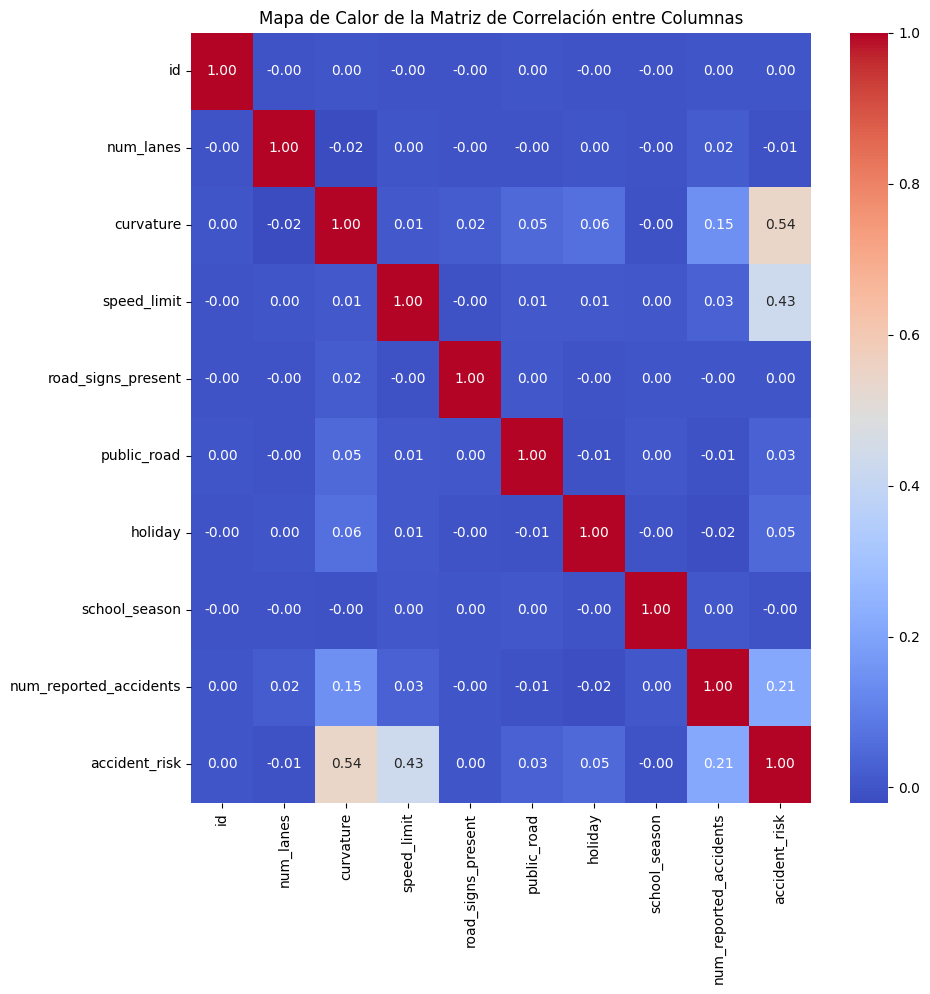

In [4]:
# Calcular la matriz de correlación
correlation_matrix = df_train_visualization.corr(numeric_only=True)

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura según necesites
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de la Matriz de Correlación entre Columnas')
plt.show()

In [ ]:
# Utilizo las curvas de densidad debido a que me aportan mayor información relevante sobre los datos que se pueden visualizar
# 2. Crear la matriz de 3 filas y 3 columnas
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

# 3. Lista de variables 'hue' a usar
hues = ["road_type", "lighting", "weather", "time_of_day", 'road_signs_present', 'public_road', 'holiday', 'school_season']

# 4. Iterar sobre las variables y los ejes
for ax, hue_var in zip(axs.flat, hues):
    # Generar la curva de densidad (KDE)
    sns.kdeplot(
        data=df_train,
        x="num_lanes",
        hue=hue_var,
        # 'multiple' no es necesario para KDE, por defecto superpone ('layer')
        ax=ax,           # ¡Importante! Pasar el eje
        fill=True,       # Rellenar el área bajo la curva (opcional, ayuda a la visualización)
        alpha=0.3        # Transparencia para facilitar la superposición
    )
    
    # Establecer un título descriptivo
    ax.set_title(f'KDE de Speed Limit por {hue_var.replace("_", " ").title()}')

# 5. Ocultar el último eje vacío si hay un número impar de gráficas (8 variables en 9 subplots)
if len(hues) < len(axs.flat):
    axs.flat[len(hues)].set_visible(False) 

# 6. Ajustar el diseño para evitar solapamientos
fig.tight_layout(pad=3.0) 

# Mostrar la figura con todos los subgráficos
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Suponiendo que 'df_train' ya está definido

# 2. Crear la matriz de 3 filas y 3 columnas
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

# 3. Lista de variables 'hue' a usar
hues = ["road_type", "lighting", "weather", "time_of_day", 'road_signs_present', 'public_road', 'holiday', 'school_season']

# 4. Iterar sobre las variables y los ejes
for ax, hue_var in zip(axs.flat, hues):
    # Generar la curva de densidad (KDE)
    sns.kdeplot(
        data=df_train,
        x="curvature",
        hue=hue_var,
        # 'multiple' no es necesario para KDE, por defecto superpone ('layer')
        ax=ax,           # ¡Importante! Pasar el eje
        fill=True,       # Rellenar el área bajo la curva (opcional, ayuda a la visualización)
        alpha=0.3        # Transparencia para facilitar la superposición
    )
    
    # Establecer un título descriptivo
    ax.set_title(f'KDE de Speed Limit por {hue_var.replace("_", " ").title()}')

# 5. Ocultar el último eje vacío si hay un número impar de gráficas (8 variables en 9 subplots)
if len(hues) < len(axs.flat):
    axs.flat[len(hues)].set_visible(False) 

# 6. Ajustar el diseño para evitar solapamientos
fig.tight_layout(pad=3.0) 

# Mostrar la figura con todos los subgráficos
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Suponiendo que 'df_train' ya está definido

# 2. Crear la matriz de 3 filas y 3 columnas
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

# 3. Lista de variables 'hue' a usar
hues = ["road_type", "lighting", "weather", "time_of_day", 'road_signs_present', 'public_road', 'holiday', 'school_season']

# 4. Iterar sobre las variables y los ejes
for ax, hue_var in zip(axs.flat, hues):
    # Generar la curva de densidad (KDE)
    sns.kdeplot(
        data=df_train,
        x="speed_limit",
        hue=hue_var,
        # 'multiple' no es necesario para KDE, por defecto superpone ('layer')
        ax=ax,           # ¡Importante! Pasar el eje
        fill=True,       # Rellenar el área bajo la curva (opcional, ayuda a la visualización)
        alpha=0.3        # Transparencia para facilitar la superposición
    )
    
    # Establecer un título descriptivo
    ax.set_title(f'KDE de Speed Limit por {hue_var.replace("_", " ").title()}')

# 5. Ocultar el último eje vacío si hay un número impar de gráficas (8 variables en 9 subplots)
if len(hues) < len(axs.flat):
    axs.flat[len(hues)].set_visible(False) 

# 6. Ajustar el diseño para evitar solapamientos
fig.tight_layout(pad=3.0) 

# Mostrar la figura con todos los subgráficos
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Suponiendo que 'df_train' ya está definido

# 2. Crear la matriz de 3 filas y 3 columnas
fig, axs = plt.subplots(3, 3, figsize=(14, 10))

# 3. Lista de variables 'hue' a usar
hues = ["road_type", "lighting", "weather", "time_of_day", 'road_signs_present', 'public_road', 'holiday', 'school_season']

# 4. Iterar sobre las variables y los ejes
for ax, hue_var in zip(axs.flat, hues):
    # Generar la curva de densidad (KDE)
    sns.kdeplot(
        data=df_train,
        x="num_reported_accidents",
        hue=hue_var,
        # 'multiple' no es necesario para KDE, por defecto superpone ('layer')
        ax=ax,           # ¡Importante! Pasar el eje
        fill=True,       # Rellenar el área bajo la curva (opcional, ayuda a la visualización)
        alpha=0.3        # Transparencia para facilitar la superposición
    )
    
    # Establecer un título descriptivo
    ax.set_title(f'KDE de Speed Limit por {hue_var.replace("_", " ").title()}')

# 5. Ocultar el último eje vacío si hay un número impar de gráficas (8 variables en 9 subplots)
if len(hues) < len(axs.flat):
    axs.flat[len(hues)].set_visible(False) 

# 6. Ajustar el diseño para evitar solapamientos
fig.tight_layout(pad=3.0) 

# Mostrar la figura con todos los subgráficos
plt.show()

In [ ]:
columnas = ['road_signs_present','public_road','holiday','school_season']
df_train_boxplot = df_train_visualization.drop(columnas, axis=1)
plt.figure(figsize=(20, 8))
for i, column in enumerate(df_train_boxplot.columns):
    plt.subplot(1, len(df_train_boxplot.columns), i + 1) # Subplots para cada columna

    # Graficar la curva de violín
    #sns.violinplot(y=train_df[column], inner=None, color=".8") # inner=None para quitar las líneas internas

    # Superponer el diagrama de caja
    sns.boxplot(y=df_train_boxplot[column], width=0.3, color="white")

    plt.title(column)
    plt.ylabel('') # Evitar etiquetas de eje y repetitivas
    plt.tight_layout() # Ajustar el espaciado entre subplots

# Training Models

In [7]:
columns = ['id']
df_train_util = df_train.drop(columns, axis=1)

In [8]:
Y_train = df_train_util["accident_risk"]
X_train = df_train_util.drop(['accident_risk'], axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

# Catboost

In [ ]:
categorical_features_names = ['road_type','lighting','weather','time_of_day']

### Con KFold

In [ ]:
def objective(trial):
    model = catboost.CatBoostRegressor(
        iterations=trial.suggest_int("iterations", 100, 300),
        learning_rate=trial.suggest_float("learning_rate", 5e-3, 1e-1, log=True),
        depth=trial.suggest_int("depth", 4, 8),
        l2_leaf_reg=trial.suggest_float("l2_leaf_reg", 1e-8, 100.0, log=True),
        bootstrap_type=trial.suggest_categorical("bootstrap_type", ["Bayesian"]),
        random_strength=trial.suggest_float("random_strength", 1e-8, 10.0, log=True),
        bagging_temperature=trial.suggest_float("bagging_temperature", 0.0, 10.0),
        od_type=trial.suggest_categorical("od_type", ["IncToDec", "Iter"]),
        od_wait=trial.suggest_int("od_wait", 10, 50),
        verbose=0,
        #cat_features=categorical_features_names,
        #task_type='GPU'
    )
    # Inicializar la validación cruzada. Usar KFold para problemas de regresión
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []
    
    # Bucle de validación cruzada sobre el conjunto de entrenamiento (X, y)
    # Asumo que las variables x_train y y_train están disponibles globalmente o se pasan
    for train_index, val_index in kf.split(x_train, y_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Crear y entrenar el modelo con los hiperparámetros sugeridos por Optuna
        model = catboost.CatBoostRegressor(**trial.params,task_type='GPU') # Usar Regressor
        
        # El conjunto de evaluación es importante para el early stopping
        model.fit(X_train_fold, y_train_fold,
                  cat_features=categorical_features_names,
                  eval_set=(X_val_fold, y_val_fold),
                  early_stopping_rounds=40, 
                  verbose=0)
        
        # Predecir el valor de regresión (no probabilidades)
        y_pred_catboost = model.predict(X_val_fold)
        
        # Calcular el RMSE (Raíz del Error Cuadrático Medio)
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_catboost))
        rmse_scores.append(rmse)
        
    # La función objective debe devolver el promedio de las puntuaciones de RMSE
    # Optuna debe ser configurado para MINIMIZAR este valor
    return np.mean(rmse_scores)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)

In [ ]:
#Create the study
study_catboost = optuna.create_study(study_name="catboost_regressor_tuning", direction="minimize", sampler=sampler)
study_catboost.optimize(objective, n_trials=100)

In [ ]:
#evaluate the trial
print("Number of finished trials: ", len(study_catboost.trials))
print("Best trial:")
trial = study_catboost.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
Cat_Boost_Regressor_Tuned = catboost.CatBoostRegressor(
    **trial.params, 
    verbose=0, 
    task_type='GPU',
    cat_features=categorical_features_names)

In [ ]:
Cat_Boost_Regressor_Tuned.fit(x_train, y_train)

In [ ]:
Predict_Accident_Risk = Cat_Boost_Regressor_Tuned.predict(x_test)

# Modelos que no pueden manejar variables categóricas

In [9]:
# Utilizar unicamente para los modelos Logistic Regression, Decision Tree Classifier y KNN
df_encoded = pd.get_dummies(df_train_util, columns=["road_type", "lighting", "weather", "time_of_day"])
df_encoded.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,accident_risk,road_type_highway,...,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,2,0.06,35,False,True,False,True,1,0.13,False,...,True,True,False,False,False,False,True,True,False,False
1,4,0.99,35,True,False,True,True,0,0.35,False,...,True,True,False,False,True,False,False,False,True,False
2,4,0.63,70,False,True,True,False,2,0.30,False,...,False,False,True,False,True,False,False,False,False,True
3,4,0.07,35,True,True,False,False,1,0.21,True,...,False,False,True,False,False,False,True,False,False,True
4,1,0.58,60,False,False,True,False,1,0.56,False,...,False,True,False,False,False,True,False,False,True,False


In [7]:
Y_train = df_encoded["accident_risk"]
X_train = df_encoded.drop(['accident_risk'], axis=1)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=42)

## XGBoost

In [24]:
def objective(trial):
    model = xgb.XGBRegressor(
        n_estimators=trial.suggest_int("n_estimators", 100, 500),
        learning_rate=trial.suggest_float("learning_rate", 5e-3, 1e-1, log=True),
        max_depth=trial.suggest_int("max_depth", 5, 9),
        reg_lambda=trial.suggest_float("reg_lambda", 1e-2, 10.0, log=True),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),
        objective= 'reg:squarederror',
        #device='cuda',
        #tree_method='gpu_hist',
        n_jobs= -1,
        random_state= 42,
        verbosity= 0,
    )
    # Inicializar la validación cruzada. Usar KFold para problemas de regresión
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []
    
    # Bucle de validación cruzada sobre el conjunto de entrenamiento (X, y)
    # Asumo que las variables x_train y y_train están disponibles globalmente o se pasan
    for train_index, val_index in kf.split(x_train, y_train):
        X_train_fold, X_val_fold = x_train.iloc[train_index], x_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Crear y entrenar el modelo con los hiperparámetros sugeridos por Optuna
        model = xgb.XGBRegressor(**trial.params, tree_method='gpu_hist') # Usar Regressor
        
        # El conjunto de evaluación es importante para el early stopping
        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  early_stopping_rounds=30, 
                  verbose=False)
        
        # Predecir el valor de regresión (no probabilidades)
        y_pred_xgboost = model.predict(X_val_fold)
        
        # Calcular el RMSE (Raíz del Error Cuadrático Medio)
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred_xgboost))
        rmse_scores.append(rmse)
        
    # La función objective debe devolver el promedio de las puntuaciones de RMSE
    # Optuna debe ser configurado para MINIMIZAR este valor
    return np.mean(rmse_scores)

In [25]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)

In [26]:
#Create the study
study_xgb = optuna.create_study(study_name="xgboost_regressor_tuning", direction="minimize", sampler=sampler)
study_xgb.optimize(objective, n_trials=100)

In [27]:
#evaluate the trial
print("Number of finished trials: ", len(study_xgb.trials))
print("Best trial:")
trial = study_xgb.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  100
Best trial:
  Value:  0.05596759729780665
  Params: 
    n_estimators: 351
    learning_rate: 0.023019125347408822
    max_depth: 8
    reg_lambda: 0.08163405485643499
    subsample: 0.7546956570124633
    colsample_bytree: 0.9717070713368376


### Hiperparametros Elegidos
#### Con los hiperparametros iniciales

* Number of finished trials:  100
* Best trial:
  * Value:  0.055993482036014654
  * Params: 
    * n_estimators: 299
    * learning_rate: 0.08300821978450429
    * max_depth: 7
    * reg_lambda: 0.8935355187136632
    * subsample: 0.8518138897583256
    * colsample_bytree: 0.988323490395427
#### Cambiando la profundidad dentro del rango de 5 a 9, la predicción ha mejorado, por lo tanto se puede seguir con el cambio en la profundidad del modelo o intentar con nuevos hiperparametros para catboost
* Number of finished trials:  100
* Best trial:
  * Value:  0.05596759729780665
  * Params: 
    * n_estimators: 351
    * learning_rate: 0.023019125347408822
    * max_depth: 8
    * reg_lambda: 0.08163405485643499
    * subsample: 0.7546956570124633
    * colsample_bytree: 0.9717070713368376

In [28]:
XGB_Regressor_Tuned = xgb.XGBRegressor(
    **trial.params, 
    verbosity=0, 
    tree_method='gpu_hist')

In [29]:
XGB_Regressor_Tuned.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9717070713368376, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.023019125347408822, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=351, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
Predict_Accident_Risk = XGB_Regressor_Tuned.predict(x_test)

## Support Machine Regressor

In [10]:
import cupy as cp
from cuml.svm import SVR

In [44]:
# 1. Separar la variable objetivo y las características en Pandas (CPU)
# Asume que df_encoded ya tiene las columnas categóricas codificadas
y_cpu = df_encoded["accident_risk"]
X_cpu = df_encoded.drop(['accident_risk'], axis=1)

for col in X_cpu.columns:
    if X_cpu[col].dtype == 'bool':
        X_cpu[col] = X_cpu[col].astype('int32')

# 2. Convertir a NumPy si es necesario (puede ayudar a eliminar cualquier resto de 'object' si las columnas son numéricas)
# El .values es crucial para obtener la representación subyacente de NumPy
X_np = X_cpu.values
y_np = y_cpu.values

Y_gpu = cp.asarray(y_np)
X_gpu = cp.asarray(X_np)

In [11]:
# 1. Cargar TODOS los datos en la GPU (como lo hiciste)
X_all_gpu = cp.asarray(df_encoded.drop(['accident_risk'], axis=1).values, dtype=cp.float32)
Y_all_gpu = cp.asarray(df_encoded["accident_risk"].values, dtype=cp.float32)

# 2. DEFINIR EL SPLIT INICIAL FUERA DE OPTUNA (¡CORRECCIÓN!)
# Dividir el conjunto total en entrenamiento (para Optuna) y prueba (para evaluación final)
X_train_gpu, X_test_gpu, Y_train_gpu, Y_test_gpu = train_test_split(
    X_all_gpu, Y_all_gpu, test_size=0.2, random_state=42
)

In [12]:
def objective(trial):
    model = SVR(
        C=trial.suggest_float("C", 1e-4, 10, log=True),
        kernel=trial.suggest_categorical("kernel", ["linear","rbf","poly","sigmoid"]),
        gamma=trial.suggest_float("gamma", 1e-4, 1, log=True),
        epsilon=trial.suggest_float("epsilon", 1e-3, 0.5),
        degree=trial.suggest_int("degree", 2, 5),
        tol=trial.suggest_float("tol", 1e-5, 1e-2, log=True),
    )
    # Inicializar la validación cruzada. Usar KFold para problemas de regresión
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    rmse_scores = []
    
    # Bucle de validación cruzada sobre el conjunto de entrenamiento (X, y)
    # Asumo que las variables x_train y y_train están disponibles globalmente o se pasan
    for train_index, val_index in kf.split(X_train_gpu):
        # Uso de corchetes [ ] para indexar el array de CuPy
        X_train_fold_gpu = X_train_gpu[train_index]
        X_val_fold_gpu = X_train_gpu[val_index]
        y_train_fold_gpu = Y_train_gpu[train_index]
        y_val_fold_gpu = Y_train_gpu[val_index]

        # Crear y entrenar el modelo con los hiperparámetros sugeridos por Optuna
        model = SVR(**trial.params) # Usar Regressor
        
        # El conjunto de evaluación es importante para el early stopping
        model.fit(X_train_fold_gpu, y_train_fold_gpu)
        
        # Predecir el valor de regresión (no probabilidades)
        y_pred_svr_gpu = model.predict(X_val_fold_gpu)
        
        # Calcular el RMSE (Raíz del Error Cuadrático Medio)
        rmse = np.sqrt(mean_squared_error(y_val_fold_gpu.get(), y_pred_svr_gpu.get()))
        rmse_scores.append(rmse)
        
    # La función objective debe devolver el promedio de las puntuaciones de RMSE
    # Optuna debe ser configurado para MINIMIZAR este valor
    return np.mean(rmse_scores)

In [13]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)

In [ ]:
#Create the study
study_svr = optuna.create_study(study_name="SVR_regressor_tuning", direction="minimize", sampler=sampler)
study_svr.optimize(objective, n_trials=100)

[2025-10-29 01:15:06.624] [CUML] [warning] SVR with the linear kernel can be much faster using the specialized solver provided by LinearSVR. Consider switching to LinearSVR if tranining takes too long.


#### Hiperparametros elegidos con los hiperparametros iniciales


In [ ]:
#evaluate the trial
print("Number of finished trials: ", len(study_svr.trials))
print("Best trial:")
trial = study_svr.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
SVM_Regressor_Tuned = SVR(
    **trial.params)

In [ ]:
SVM_Regressor_Tuned.fit(x_train, y_train)

In [ ]:
Predict_Accident_Risk = SVM_Regressor_Tuned.predict(x_test)

## Decision Tree Regressor

In [ ]:
#Use Optuna to find the best hyperparameters
def objective(trial):
    model = DecisionTreeRegressor(
        criterion = trial.suggest_categorical("criterion", ["squared_error", "friedman_mse", "absolute_error", "poisson"]),
        splitter=trial.suggest_categorical("splitter",["best","random"]),
        max_depth = trial.suggest_int("max_depth", 3, 20, log=False),
        min_samples_split = trial.suggest_int("min_samples_split", 2, 40),
        min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20),
        min_weight_fraction_leaf = trial.suggest_float("min_weight_fraction_leaf", 0.0, 0.5),
        max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        ccp_alpha = trial.suggest_float("ccp_alpha", 0.0, 0.1),
        random_state=42
    )
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    # Paso 1: Calcular el Error Cuadrático Medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    
    # Paso 2: Aplicar la raíz cuadrada para obtener el RMSE
    rmse = np.sqrt(mse)
    
    # 3. Devolver el RMSE (la métrica a minimizar)
    return rmse

# Prediction and Submission

In [31]:
columns = ['id']
df_test_util = df_test.drop(columns, axis=1)

## Catboost

In [ ]:
prediction_Y=Cat_Boost_Regressor_Tuned.predict(df_test_util)

In [ ]:
prediction_df = df_test.assign(accident_risk=prediction_Y)
prediction_df.head()

In [ ]:
Submission = prediction_df[['id', 'accident_risk']]
Submission.head()

In [ ]:
Submission.to_csv('Prediction_Catboost_Regressor_2.csv', index=False)

## XGBoost

In [32]:
# Utilizar unicamente para los modelos Logistic Regression, Decision Tree Classifier y KNN
df_encoded_test = pd.get_dummies(df_test_util, columns=["road_type", "lighting", "weather", "time_of_day"])
df_encoded_test.head()

,num_lanes,curvature,speed_limit,road_signs_present,public_road,holiday,school_season,num_reported_accidents,road_type_highway,road_type_rural,road_type_urban,lighting_daylight,lighting_dim,lighting_night,weather_clear,weather_foggy,weather_rainy,time_of_day_afternoon,time_of_day_evening,time_of_day_morning
0,2,0.34,45,True,True,True,True,1,True,False,False,False,False,True,True,False,False,True,False,False
1,3,0.04,45,True,False,True,False,0,False,False,True,False,True,False,False,True,False,True,False,False
2,2,0.59,35,True,False,True,True,1,False,False,True,False,True,False,True,False,False,True,False,False
3,4,0.95,35,False,False,False,False,2,False,True,False,True,False,False,False,False,True,True,False,False
4,2,0.86,35,True,False,False,True,3,True,False,False,True,False,False,True,False,False,False,True,False


In [33]:
prediction_Y=XGB_Regressor_Tuned.predict(df_encoded_test)

In [34]:
prediction_df_xgb = df_test.assign(accident_risk=prediction_Y)
prediction_df_xgb.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1,0.291825
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0,0.122225
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1,0.179322
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2,0.317234
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3,0.402809


In [35]:
Submission_xgb = prediction_df_xgb[['id', 'accident_risk']]
Submission_xgb.head()

,id,accident_risk
0,517754,0.291825
1,517755,0.122225
2,517756,0.179322
3,517757,0.317234
4,517758,0.402809


In [36]:
Submission_xgb.to_csv('Prediction_XGBoost_Regressor_4.csv', index=False)

## Support Vector Machine Regressor

In [ ]:
# 1. Cargar TODOS los datos en la GPU (como lo hiciste)
X_test_gpu = cp.asarray(df_encoded_test.values, dtype=cp.float32)

In [ ]:
prediction_Y=SVM_Regressor_Tuned.predict(df_encoded_test)


In [ ]:
prediction_df_svr = df_test.assign(accident_risk=prediction_Y)
prediction_df_svr.head()

In [ ]:
Submission_svr = prediction_df_svr[['id', 'accident_risk']]
Submission_svr.head()

In [ ]:
Submission_svr.to_csv('Prediction_Support_Machine_Regressor_0.csv', index=False)

# Metamodelo

In [ ]:
study_catboost = optuna.create_study(study_name="catboost_regressor_tuning", direction="minimize", sampler=sampler)
study_catboost.optimize(objective, n_trials=100)
study_xgb = optuna.create_study(study_name="xgboost_regressor_tuning", direction="minimize", sampler=sampler)
study_xgb.optimize(objective, n_trials=100)

In [ ]:
# Extraer los mejores parámetros como diccionarios
best_xgb_params = study_xgb.best_params
best_cb_params = study_catboost.best_params

In [ ]:
# ------------------------------------------------------------------------------
# 0. ASUNCIONES Y CONFIGURACIÓN (Asegúrate de que estas variables existan)
# ------------------------------------------------------------------------------
# X_train, Y_train (o df_train['accident_risk']), BEST_CB_PARAMS, BEST_XGB_PARAMS
N_SPLITS = 5
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# ------------------------------------------------------------------------------
# 1. INICIALIZACIÓN (Afuera de los bucles/funciones)
# ------------------------------------------------------------------------------

# Inicializa arreglos para guardar las predicciones OOF para el 100% de X_train
# ¡Esto resuelve el NameError!
oof_preds_catboost = np.zeros(len(X_train))
oof_preds_xgboost = np.zeros(len(X_train))
Y_meta = df_train['accident_risk'] # Tu target completo

# ------------------------------------------------------------------------------
# 2. BUCLE K-FOLD PARA GENERAR LOS VALORES OOF
# ------------------------------------------------------------------------------

for fold, (train_idx, val_idx) in enumerate(kf.split(X_train, Y_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    Y_train_fold, Y_val_fold = Y_train.iloc[train_idx], Y_train.iloc[val_idx]
    
    # -- CatBoost --
    # Usar los mejores HPs (BEST_CB_PARAMS)
    model_cb = CatBoostRegressor(**best_cb_params, verbose=0, random_seed=42)
    model_cb.fit(X_train_fold, Y_train_fold)
    
    # 🚨 PREDICCIÓN Y ASIGNACIÓN OOF:
    # Llenamos las posiciones del fold de validación con las predicciones
    oof_preds_catboost[val_idx] = model_cb.predict(X_val_fold)
    
    # -- XGBoost --
    # Usar los mejores HPs (BEST_XGB_PARAMS)
    model_xgb = xgb.XGBRegressor(**best_cb_params, verbosity=0, random_state=42)
    model_xgb.fit(X_train_fold, Y_train_fold)
    
    # 🚨 PREDICCIÓN Y ASIGNACIÓN OOF:
    oof_preds_xgboost[val_idx] = model_xgb.predict(X_val_fold)
    
# ------------------------------------------------------------------------------
# 3. CREACIÓN DEL DATAFRAME META (AHORA FUNCIONAL)
# ------------------------------------------------------------------------------

X_meta = pd.DataFrame({
    'CatBoost_Pred': oof_preds_catboost, # Usa el array lleno
    'XGBoost_Pred': oof_preds_xgboost   # Usa el array lleno
})
# Y_meta ya está definido

X_meta.head()

In [ ]:
X_meta.tail()

In [ ]:
def objective(trial):
    model = lgb.LGBMRegressor(
        n_estimators=trial.suggest_int("n_estimators", 50, 250),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.2, log=True),
        max_depth=trial.suggest_int("max_depth", 2, 4),
        num_leaves=trial.suggest_int("num_leaves", 5, 15),
        min_child_samples=trial.suggest_int("min_child_samples", 10, 50),
        reg_alpha=trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        reg_lambda= trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        subsample=trial.suggest_float("subsample", 0.6, 1.0),
        colsample_bytree=trial.suggest_float("colsample_bytree", 0.6, 1.0),
        #device='cuda',
        objective= 'regression',
        metric= 'rmse',
        n_jobs= -1,
        random_state= 42,
        verbose= -1
    )
    # Inicializar la validación cruzada. Usar KFold para problemas de regresión
    kf_meta = KFold(n_splits=5, shuffle=True, random_state=42)
    meta_rmse_scores = []
    
    # Bucle de validación cruzada sobre el conjunto de entrenamiento (X, y)
    # Asumo que las variables x_train y y_train están disponibles globalmente o se pasan
    for train_index, val_index in kf_meta.split(X_meta, Y_meta):
        X_train_fold, X_val_fold = X_meta.iloc[train_index], X_meta.iloc[val_index]
        Y_train_fold, Y_val_fold = Y_meta.iloc[train_index], Y_meta.iloc[val_index]

        # Crear y entrenar el modelo con los hiperparámetros sugeridos por Optuna
        model = lgb.LGBMRegressor(**trial.params, device='gpu') # Usar Regressor
        
        # El conjunto de evaluación es importante para el early stopping
        model.fit(X_train_fold, Y_train_fold, 
                       eval_set=[(X_val_fold, Y_val_fold)], 
                       eval_metric='rmse',
                       callbacks=[lgb.early_stopping(stopping_rounds=30, verbose=False)])
        
        # Predecir el valor de regresión (no probabilidades)
        # Calcular RMSE en el fold de validación
        y_pred = model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(Y_val_fold, y_pred))
        meta_rmse_scores.append(rmse)

    return np.mean(meta_rmse_scores)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

sampler = TPESampler(seed=1)

In [ ]:
#Create the study
study = optuna.create_study(study_name="lightgbm_regressor_tuning", direction="minimize", sampler=sampler)
study.optimize(objective, n_trials=100)

In [ ]:
#evaluate the trial
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
LightGBM_Regressor_Tuned = lgb.LGBMRegressor(
    **trial.params, 
    verbosity=-1, 
    device='gpu')

In [ ]:
LightGBM_Regressor_Tuned.fit(X_meta, Y_meta)

In [ ]:
X_test_meta = pd.DataFrame({
    # Las columnas del metamodelo son las predicciones
    'CatBoost_Pred': Submission['accident_risk'],
    'XGBoost_Pred': Submission_xgb['accident_risk']
})

In [ ]:
Predict_Accident_Risk = LightGBM_Regressor_Tuned.predict(X_test_meta)

# Prediction and Submission with Metamodel

In [ ]:
prediction_df_metamodel = df_test.assign(accident_risk=prediction_Y)
prediction_df_metamodel.head()

In [ ]:
Submission_metamodel = prediction_df_metamodel[['id', 'accident_risk']]
Submission_metamodel.head()

In [ ]:
Submission_metamodel.to_csv('Prediction_LightGBM_Regressor_Metamodel_0.csv', index=False)